In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv("PISA2015-forStage2.csv", skiprows = 2)
df.shape

(32, 9)

In [2]:
df

,Jurisdiction,Region,"Averages for PISA mathematics scale: overall mathematics, age 15 years","Averages for PISA reading scale: overall reading, age 15 years","Averages for PISA science scale: overall science, age 15 years","Averages for index mother occupational status, age 15 years","Averages for index father occupational status, age 15 years","Averages for student-teacher ratio, age 15 years","Averages for index proportion of all teachers isced level 5a master, age 15 years"
0,Australia,Oceania,494,503,510,52,46,13,0.13
1,Austria,Europe,497,485,495,45,45,12,0.58
2,Belgium,Europe,507,499,502,47,46,9,0.38
3,Canada,Americas,516,527,528,53,48,16,0.17
4,Chile,Americas,423,459,447,40,41,21,0.09
5,Czech Republic,Europe,492,487,493,43,40,13,0.87
6,Denmark,Europe,511,500,502,52,49,13,0.05
7,Estonia,Europe,520,519,534,47,43,12,0.75
8,Finland,Europe,511,526,531,46,45,10,0.91
9,France,Europe,493,499,495,46,45,12,0.40


In [3]:
# extract all columns and  rename with simpler terms for the convenience of use
df.columns = ['LOCATION', 'REGION', 'MATHEMATICS', 'READING', 'SCIENCE', 'MOTHER', 'FATHER', 'TEACHER_RATIO', 'TEACHER_DEGREE']

In [4]:
# Analysis for 'score' in 3 indicators vs  'mother/father occupational status'

Text(0.15, 0.1, 'p-value: 0.011563418071951471')

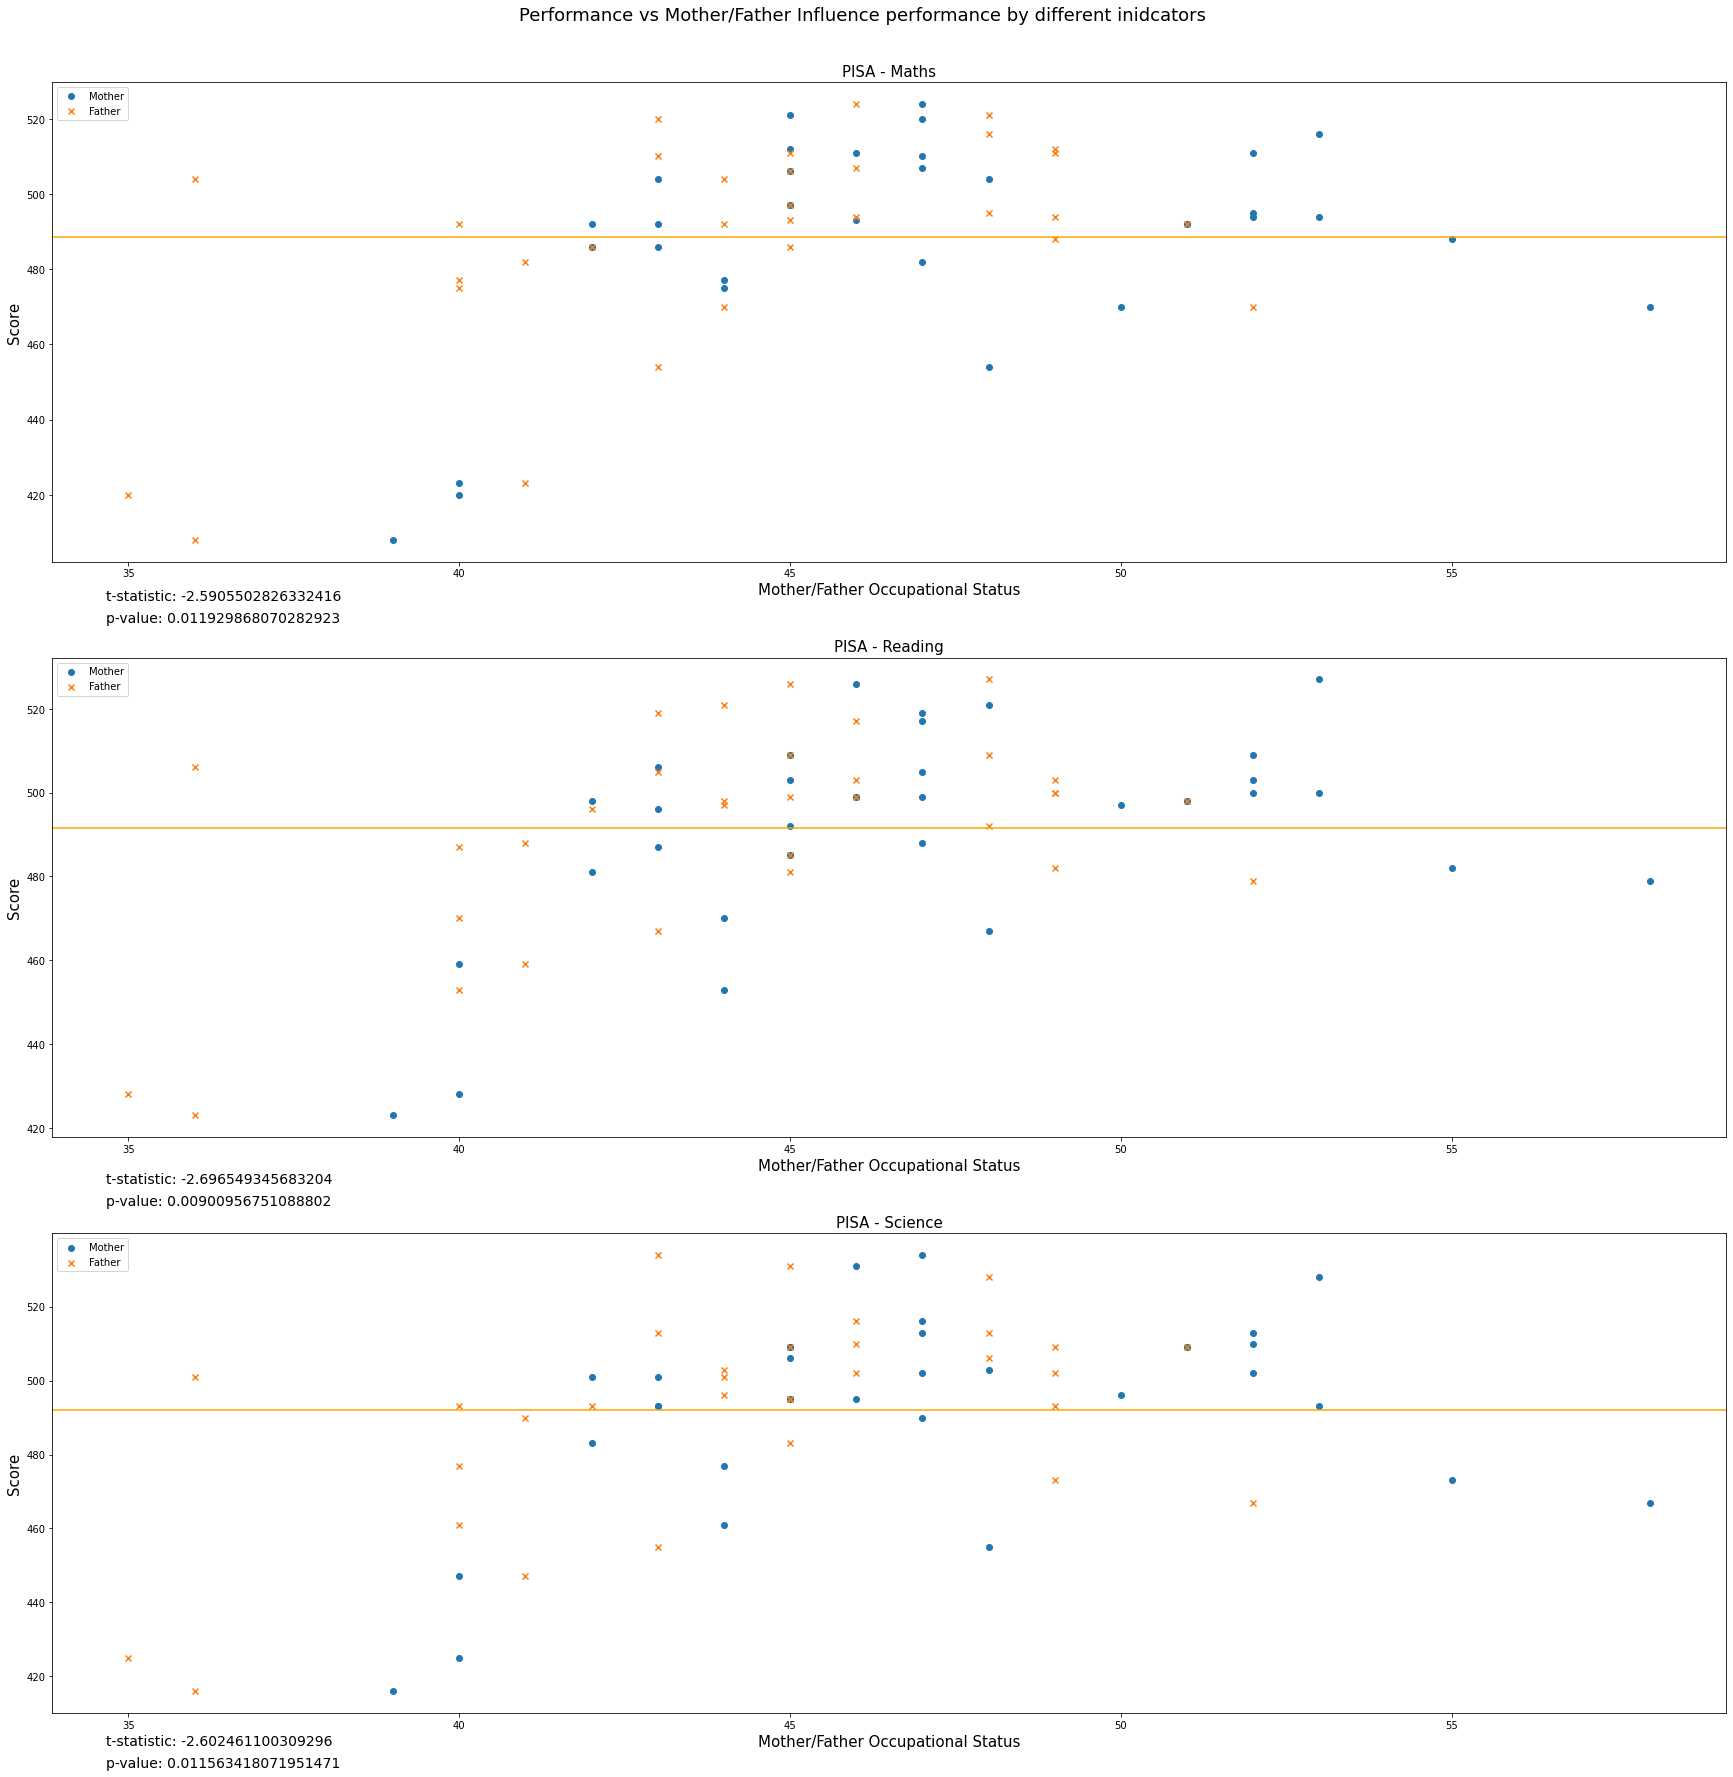

In [5]:
# # create a new data frame with 4 columns: indicator, location, boy's mean_value & girl's mean_value
# location_value = pd.DataFrame({"INDICATOR": indis, "LOCATION": locs, "BOY": boy_mean, "GIRL": girl_mean, "DIFF": diff})

# location_value.head()

fig = plt.figure(figsize = (30, 30))
indicators = ['MATHEMATICS', 'READING', 'SCIENCE']
titles = ["PISA - Maths", "PISA - Reading", "PISA - Science"] # titles of 3 subplots

t_list = []
p_list = []
for i in range(len(indicators)):
    # extract column with the target indicator    
    x = df[indicators[i]]
    y1 = df["MOTHER"]
    y2 = df["FATHER"]
    
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    # markers can be 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'.
    ax.scatter(y1, x, label = "Mother", marker='o')
    ax.scatter(y2, x, label = "Father",  marker='x')
    ax.set_xlabel("Mother/Father Occupational Status", fontsize = 15)
    ax.set_ylabel("Score", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    plt.axhline(np.mean(x), color = "orange")
    
    (t_stats, p_value) = stats.ttest_ind(x/y1, x/y2)
    
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Performance vs Mother/Father Influence performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)

In [36]:
### As shown by the p-values, which are all less than 0.05,  the differences is not clear. This is maybe due to outliers or randomness of the dataset. As such, we use binning to investigate further for a clearer trend. Scores are grouped by bins of occupational status.
K = 6
def Kbins(data, K):
    result = []
    min_val = min(data)
    max_val = max(data)
    for val in data:
        normalized_score =(val-min_val) * (K-1) / (max_val - min_val) + 1
        result.append(round(normalized_score))
    return result
df['MOTHER_BIN'] = Kbins(df['MOTHER'], 6)
df['FATHER_BIN'] =  Kbins(df['FATHER'], 6)
mother = df.groupby('MOTHER_BIN').mean()
father = df.groupby('FATHER_BIN').mean()
# y1 = mother[indicators[i]]
# y2 = father[indicators[i]]
# y2

FATHER_BIN
1    444.000000
2    481.333333
3    479.166667
4    498.545455
5    505.285714
6    481.000000
Name: MATHEMATICS, dtype: float64

Text(0.15, 0.1, 'p-value: 0.8573328829167021')

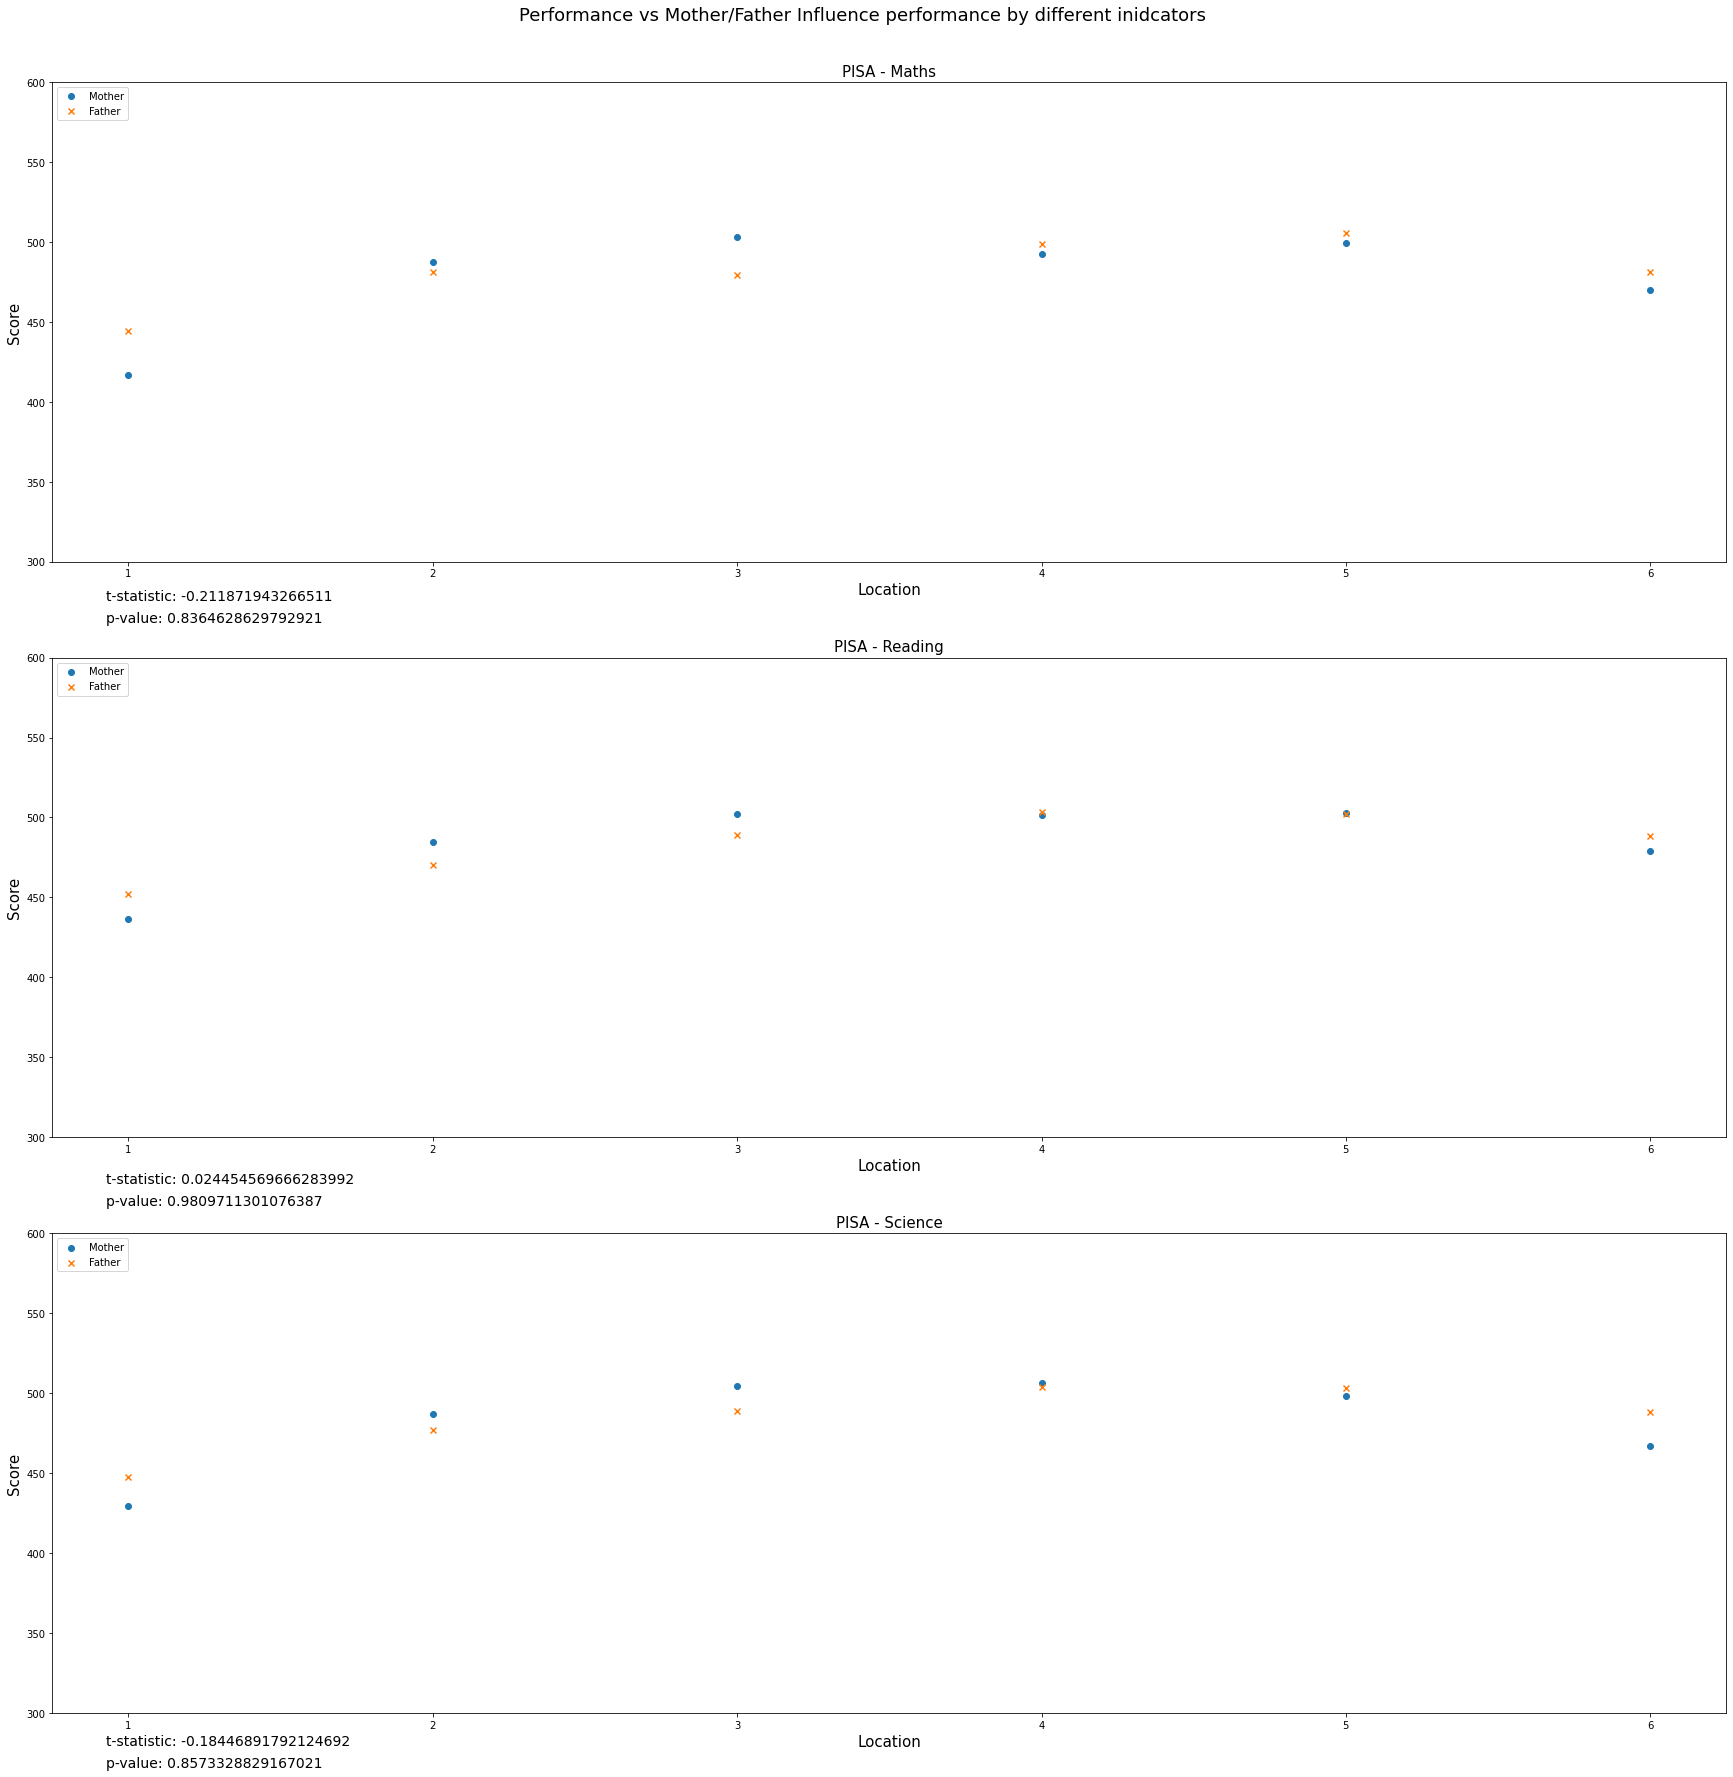

In [41]:

fig = plt.figure(figsize = (30, 30))
indicators = ['MATHEMATICS', 'READING', 'SCIENCE']
titles = ["PISA - Maths", "PISA - Reading", "PISA - Science"] # titles of 3 subplots

t_list = []
p_list = []
for i in range(len(indicators)):
    # extract column with the target indicator    
    x = range(1, K+1)
    y1 = mother[indicators[i]]
    y2 = father[indicators[i]]
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    # 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'.
    ax.scatter(x, y1, label = "Mother", marker='o')
    ax.scatter(x, y2, label = "Father",  marker='x')
    ax.set_ylim([300,600])
    ax.set_xlabel("Location", fontsize = 15)
    ax.set_ylabel("Score", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    plt.axhline(np.mean(x), color = "orange")
    
    (t_stats, p_value) = stats.ttest_ind(y1, y2)
    
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Performance vs Mother/Father Influence performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)

# Whether family influence more than teacher-ratio? 
### We want to figure out whether family differences influence score in different indicators more than differences in teachers.

# Compute z- scores for influential facors
### Since the values in the occupational status are in a small range, we decided to use the 𝑍-score for the influential factors, which is standardised score assuming normal distribution

In [ ]:
def z_score(df):
    df.columns = [x + "_zscore" for x in df.columns.tolist()]
    return (df - df.mean())/df.std(ddof=0)
factors =  df.iloc[:, [5, 6, 7, 8]].astype(float)
z_scores = z_score(factors)
print("🙉 --------------------- the z_scores ----------------------- 🙉")
z_scores

In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def normalize(data):
    result = []
    min_val = min(data)
    max_val = max(data)
    for val in data:
        normalized_score =(val-min_val) * 100 / (max_val - min_val)
        result.append(round(normalized_score))
    return result

# compute sum for family factors and teacher factors, and then normalize the sums
family = (z_scores['MOTHER_zscore'] + z_scores['FATHER_zscore']).apply(sigmoid)
df['FAMILY'] = normalize(family) 
teacher = (z_scores['TEACHER_RATIO_zscore'] + z_scores['TEACHER_DEGREE_zscore']).apply(sigmoid)
df['TEACHER'] = normalize(teacher) 

In [ ]:
df

In [ ]:
fig = plt.figure(figsize = (30, 30))
indicators = ['MATHEMATICS', 'READING', 'SCIENCE']
titles = ["PISA - Maths", "PISA - Reading", "PISA - Science"] # titles of 3 subplots

t_list = []
p_list = []
for i in range(len(indicators)):
    # extract column with the target indicator    
    x = df[indicators[i]]
    y1 = df["FAMILY"]
    y2 = df["TEACHER"]
    
    ax = fig.add_subplot(3, 1, i + 1) # draw 3 subplots in 1 columns
    
    # draw subplot and set parameters
    # 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'.
    ax.scatter(y1, x, label = "Mother", marker='o')
    ax.scatter(y2, x, label = "Father",  marker='x')
    #plt.xticks(df['LOCATION'])
    ax.set_xlabel("Location", fontsize = 15)
    ax.set_ylabel("Score", fontsize = 15)
    ax.set_title(titles[i], fontsize = 15)
    ax.legend(loc = 2)
    
    (t_stats, p_value) = stats.ttest_ind(y1/x, y2/x)
    
    t_list.append(t_stats)
    p_list.append(p_value)

fig.suptitle("Family vs Teacher Influence performance by different inidcators", fontsize = 18, y = 0.915)
fig.text(0.15, 0.64, ("t-statistic: " + str(t_list[0])), fontsize = 14)
fig.text(0.15, 0.63, ("p-value: " + str(p_list[0])), fontsize = 14)
fig.text(0.15, 0.37, ("t-statistic: " + str(t_list[1])), fontsize = 14)
fig.text(0.15, 0.36, ("p-value: " + str(p_list[1])), fontsize = 14)
fig.text(0.15, 0.11, ("t-statistic: " + str(t_list[2])), fontsize = 14)
fig.text(0.15, 0.10, ("p-value: " + str(p_list[2])), fontsize = 14)



In [ ]:
# logistic regression to be continued 